In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [4]:
data = pd.read_csv('/Users/shikharghimire/Desktop/TimeSeries-Practice/data/airline_passengers.csv',index_col = 'Month',parse_dates = True)

In [5]:
#Let's drop empty values
data = data.dropna()

In [8]:
data.index 
#What's important to know about in holt's winter method is we have to make sure we know what the frequency of the data is
#If it's daily data, monthly data or daily data

#If you look at below,  in freq, you notice that the pandas puts None as default. We will need to tell statsmodel that there
# is a frequency to this data 

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [10]:
data.index.freq = 'MS' #Since the observation occurs at the start of each month, the string code that we are going to provide is
#capital M and capital S
#Check time series documentation on offset aliases

In [14]:
data.index #Now we have the frequency MS

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [22]:
data

,Thousands of Passengers,EWM12
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861
...,...,...
1960-08-01,606,494.898619
1960-09-01,508,496.914216
1960-10-01,461,491.388952


In [23]:
span = 12
alpha = 2/(span+1)
data['EWM12'] = data['Thousands of Passengers'].ewm(alpha=alpha,adjust = False).mean()

In [32]:
#Let's see if we can do the same thing but with statsmodels using these simple exponential smoothing export
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
#Create the model
#Fit the model
model = SimpleExpSmoothing(data['Thousands of Passengers'])
fitted_model = model.fit(smoothing_level = alpha,optimized = False) #Smoothing value is just the alpha value we defined
#optimized = False because we are providing the alpha values
data['SES12'] = fitted_model.fittedvalues.shift(-1) 

In [36]:
#Double exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
data['DES_add_12'] = ExponentialSmoothing(data['Thousands of Passengers'],trend ='add' ).fit().fittedvalues.shift(-1)

#For trend if the time series displays a straight line sloped trend, you would use additive adjustment. 
#If time series displays a curved trend, you would display a multiplicative adjustment
#In this data we don't know whether trend is additive or multiplicative so we just test both

In [38]:
data.columns

Index(['Thousands of Passengers', 'EWM12', 'SES12', 'DES_add_12'], dtype='object')

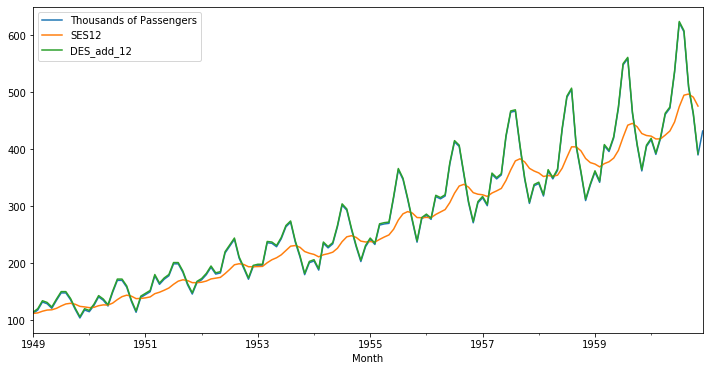

In [41]:
data[['Thousands of Passengers','SES12','DES_add_12']].plot(figsize=(12,6)) #We didn't include EWM12 because its duplicate of SES12 but you can remove either one

#See how DES_add_12 predicted thousands of Passengers so accurately

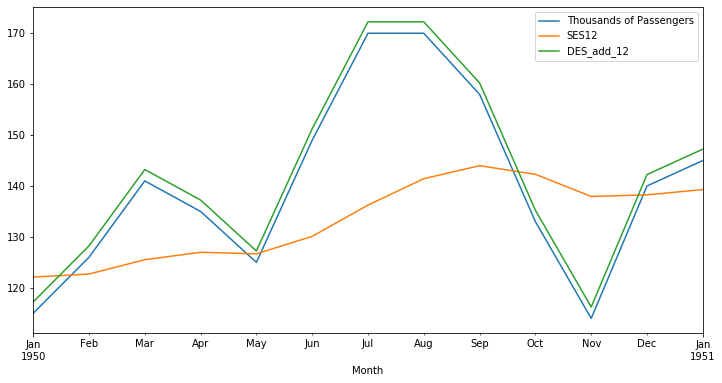

In [43]:
#If we want to just see the section what we can do is
data[['Thousands of Passengers','SES12','DES_add_12']].iloc[12:25].plot(figsize=(12,6))

In [44]:
#Double exponential smoothing does much better representation than single weighted average would do

In [45]:
data['DES_MUL_12'] = ExponentialSmoothing(data['Thousands of Passengers'],trend ='mul' ).fit().fittedvalues.shift(-1)

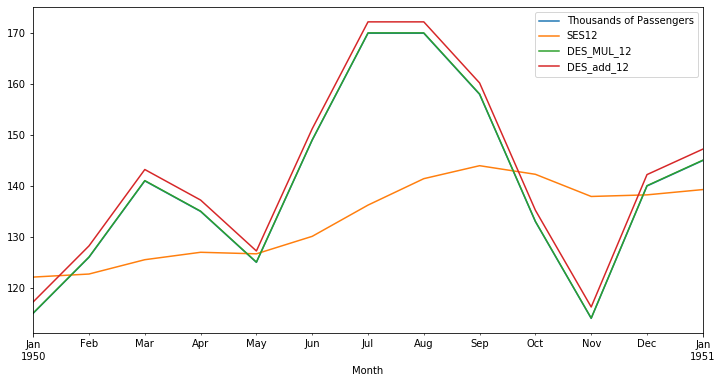

In [48]:
data[['Thousands of Passengers','SES12','DES_MUL_12','DES_add_12']].iloc[12:25].plot(figsize=(12,6))

In [ ]:
#Seems like multiplicative is better

In [49]:
#Let's use triple exponential smoothing. We now have to think about seasonality components
data['TES_mul_12'] = ExponentialSmoothing(data['Thousands of Passengers'],trend = 'mul',seasonal = 'mul',seasonal_periods=12).fit().fittedvalues #Now we also have
#to look for seasonality whether it is linear or growing exponentially and put mul and add 

In [55]:
data

,Thousands of Passengers,EWM12,SES12,DES_add_12,DES_MUL_12,TES_mul_12
Month,,,,,,
1949-01-01,112,112.000000,112.000000,114.237764,112.049247,111.620925
1949-02-01,118,112.923077,112.923077,120.237764,118.051885,118.857726
1949-03-01,132,115.857988,115.857988,134.237764,132.058041,133.348021
1949-04-01,129,117.879836,117.879836,131.237764,129.056722,127.907733
1949-05-01,121,118.359861,118.359861,123.237764,121.053204,120.987070
...,...,...,...,...,...,...
1960-08-01,606,494.898619,494.898619,608.237764,606.266459,629.397958
1960-09-01,508,496.914216,496.914216,510.237764,508.223369,511.998694
1960-10-01,461,491.388952,491.388952,463.237764,461.202703,448.033795


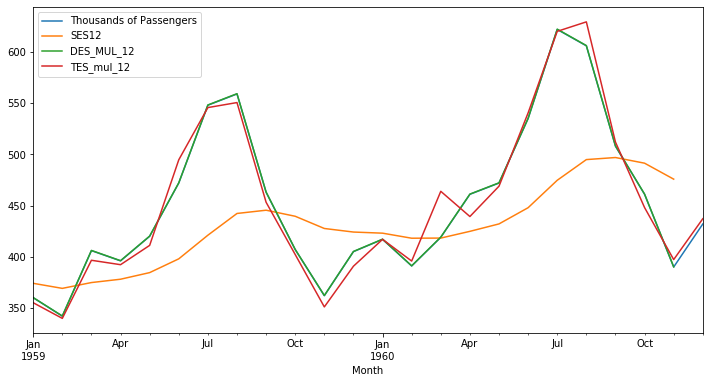

In [54]:
data[['Thousands of Passengers','SES12','DES_MUL_12','TES_mul_12']].iloc[-24:].plot(figsize=(12,6))
#Looks like deouble exponential smoothing works better than triple exponential smoothing